In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [8]:
data = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
data.shape

(569, 30)

Before Applying PCA we need to scale our data with mean = 0 and Standard Deviation =1, with the help of standard scalar

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
scaled_data = scaler.fit_transform(data)

In [12]:
X_Scaled = pd.DataFrame(scaled_data,columns=data.columns)

In [13]:
X_Scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Now with the help of PCA lets find out how many PCA's can explain 90% varience in the dataa sets with the help of Scree plots.

In [16]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA()
pca_componets = pca.fit_transform(X_Scaled)

In [20]:
print(pca_componets)

[[ 9.19283683e+00  1.94858307e+00 -1.12316616e+00 ... -3.39144536e-02
   4.56477199e-02 -4.71692081e-02]
 [ 2.38780180e+00 -3.76817174e+00 -5.29292687e-01 ...  3.26241827e-02
  -5.68742432e-03 -1.86787626e-03]
 [ 5.73389628e+00 -1.07517380e+00 -5.51747593e-01 ...  4.70258247e-02
   3.14589659e-03  7.50534755e-04]
 ...
 [ 1.25617928e+00 -1.90229671e+00  5.62730526e-01 ... -2.57775589e-03
   6.70621179e-03  3.77041667e-03]
 [ 1.03747941e+01  1.67201011e+00 -1.87702933e+00 ... -6.80863833e-02
  -8.41632764e-02 -2.37828222e-02]
 [-5.47524330e+00 -6.70636791e-01  1.49044308e+00 ... -9.51587894e-03
  -6.09131090e-02 -1.94755854e-02]]


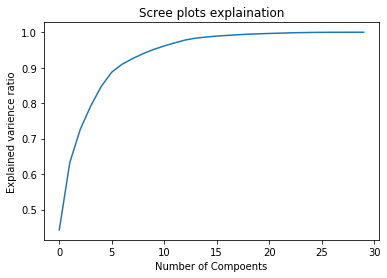

In [21]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Compoents")
plt.ylabel("Explained varience ratio")
plt.title("Scree plots explaination")
plt.show()

From the above graph we can see that with 5PCA's we can explain around 88% varience in the dataset, with 8 PCA's we can explain about 90% varience in the dataset approx..., with the Help of 10 PCA's we can explain about 95% varience in the dataset. So lets select 10 PCA's instead of giving all 30 features as a input to ML algorithm.

In [22]:
pca = PCA(n_components=10)

In [23]:
New_data = pca.fit_transform(X_Scaled)

In [24]:
new_pca_data = pd.DataFrame(New_data,
                            columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

In [25]:
new_pca_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877405
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240987,-0.711903,1.106997
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097376,0.024062,0.454281
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059567,-1.405444,-1.116966
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936212,0.636376,-0.263804,0.377701


In [34]:
X = new_pca_data
X.shape

(569, 10)

In [33]:
y = cancer['target']
y.shape

(569,)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 0)

In [37]:
rfc = RandomForestClassifier()

In [39]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
y_pred = rfc.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [44]:
print("Training data Accuracy: {}".format(rfc.score(X_train,y_train)))
print("Test data Accuracy: {}".format(rfc.score(X_test,y_test)))

Training data Accuracy: 1.0
Test data Accuracy: 0.9005847953216374


In [45]:
accuracy_score(y_test,y_pred)

0.9005847953216374

In [49]:
print("Classification Report:\n{}".format(classification_report(y_test,y_pred)))
print(cancer['target_names'])
print(confusion_matrix(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        63
           1       0.93      0.91      0.92       108

    accuracy                           0.90       171
   macro avg       0.89      0.90      0.89       171
weighted avg       0.90      0.90      0.90       171

['malignant' 'benign']
[[56  7]
 [10 98]]


Observed that we got 90% accuracy with the Random forrest algorithm, Lets see any other alogorithms which works better that Random forrest for this problem statement.

In [50]:
from sklearn.linear_model import LogisticRegression

In [56]:
classifier1 = LogisticRegression()
classifier1.fit(X_train,y_train)
y_pred1 = classifier1.predict(X_test)

In [57]:
classifier1.score(X_test,y_test)

0.9590643274853801

In [58]:
classifier1.score(X_train,y_train)

0.9849246231155779

In [59]:
print("Classification Report:\n{}".format(classification_report(y_test,y_pred1)))
#print(cancer['target_names'])
print(confusion_matrix(y_test,y_pred1))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        63
           1       0.98      0.95      0.97       108

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

[[ 61   2]
 [  5 103]]


We see that our accuracy increases by using Logistic regression, lets use Xgboost

In [60]:
from xgboost import XGBClassifier

In [61]:
classifier2 = XGBClassifier()
classifier2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [62]:
y_pred2 = classifier2.predict(X_test)

In [63]:
classifier2.score(X_test,y_test)

0.9239766081871345

In [64]:
classifier2.score(X_train,y_train)

1.0

In [65]:
print("Classification Report:\n{}".format(classification_report(y_test,y_pred1)))
#print(cancer['target_names'])
print(confusion_matrix(y_test,y_pred2))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        63
           1       0.98      0.95      0.97       108

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

[[ 58   5]
 [  8 100]]
